In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

In [29]:
holczer = pd.read_csv('holczer_ttv_systems.dat', sep='\t')
holczer = holczer.drop(['Unnamed: 3', 'Unnamed: 4'], axis=1)
print(len(holczer))

holczer = holczer[holczer['BIC score (>10 = strong evidence)'] > 10]
print(len(holczer))

holczer_koi_planets = []
holczer_ttv_amplitudes = []
holczer_ttv_BICs = []
for koi in holczer.values:
    if koi[0] not in holczer_koi_planets:
        holczer_koi_planets.append(koi[0])
        holczer_ttv_amplitudes.append(koi[1])
        holczer_ttv_BICs.append(koi[2])
        
holczer

2524
1591


,koi #,TTV amplitude (mins),BIC score (>10 = strong evidence)
1,2.01,0.072535,10.67
2,3.01,0.134158,18.51
6,12.01,1.243520,308.05
7,13.01,0.050564,33.00
13,41.02,29.922916,191.12
...,...,...,...
2515,5945.01,45.740160,51.96
2517,5952.01,265.855656,25.85
2518,5955.01,38.284111,26.01
2520,5959.01,72.946749,12.65


In [30]:
holczer_planets = []
for ii in range(0, len(holczer_koi_planets)):
    holczer_planets.append([holczer_koi_planets[ii], holczer_ttv_amplitudes[ii], holczer_ttv_BICs[ii]])


In [31]:
exoplanet_archive_kois = pd.read_csv('kois_exoplanet_archive.csv')
exoplanet_archive_kois




,kepoi_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_count
0,752.01,CONFIRMED,9.488036,2.775000e-05,-2.775000e-05,2.26,0.26,-0.15,2
1,752.02,CONFIRMED,54.418383,2.479000e-04,-2.479000e-04,2.83,0.32,-0.19,2
2,753.01,CANDIDATE,19.899140,1.494000e-05,-1.494000e-05,14.60,3.92,-1.31,1
3,754.01,FALSE POSITIVE,1.736952,2.630000e-07,-2.630000e-07,33.46,8.50,-2.83,1
4,755.01,CONFIRMED,2.525592,3.761000e-06,-3.761000e-06,2.75,0.88,-0.35,1
...,...,...,...,...,...,...,...,...,...
9559,7985.01,FALSE POSITIVE,0.527699,1.160000e-07,-1.160000e-07,29.35,7.70,-2.57,1
9560,7986.01,CANDIDATE,1.739849,1.780000e-05,-1.780000e-05,0.72,0.24,-0.08,1
9561,7987.01,FALSE POSITIVE,0.681402,2.434000e-06,-2.434000e-06,1.07,0.36,-0.11,1
9562,7988.01,CANDIDATE,333.486169,4.235000e-03,-4.235000e-03,19.30,0.55,-4.68,1


In [32]:
ttv_single_planets = []
ttv_multi_planets = []
ttv_planets = []

for ii in range(0, len(holczer_planets)):
    koi = holczer_planets[ii][0]
    amplitude = holczer_planets[ii][1]
    BICs = holczer_planets[ii][2]
    
    period = exoplanet_archive_kois.loc[
        exoplanet_archive_kois['kepoi_name'] == koi]['koi_period'].values
    disposition = exoplanet_archive_kois.loc[
        exoplanet_archive_kois['kepoi_name'] == koi]['koi_disposition'].values
    nplanets = exoplanet_archive_kois.loc[
        exoplanet_archive_kois['kepoi_name'] == koi]['koi_count'].values
    
    period = float(period)
    
    if disposition != 'FALSE POSITIVE':
        ttv_planets.append([koi, period, amplitude])
        
        if nplanets > 1:
            ttv_multi_planets.append([np.log10(period), np.log10(amplitude), BICs])
        elif nplanets == 1:
            ttv_single_planets.append([np.log10(period), np.log10(amplitude), BICs])



        
print(len(ttv_planets))
print(len(ttv_single_planets + ttv_multi_planets))


ttv_multi_planets = np.array(ttv_multi_planets).T
ttv_multi_planet_periods = ttv_multi_planets[0]
ttv_multi_planet_amplitudes = ttv_multi_planets[1]
ttv_multi_planet_BICs = ttv_multi_planets[2]


ttv_single_planets = np.array(ttv_single_planets).T
ttv_single_planet_periods = ttv_single_planets[0]
ttv_single_planet_amplitudes = ttv_single_planets[1]
ttv_single_planet_BICs = ttv_single_planets[2]



#divide by BIC max so alphas range from 0 to 1 as required
multis_BICmax = np.max(ttv_multi_planet_BICs)
singles_BICmax = np.max(ttv_single_planet_BICs)

BICmax = np.max([multis_BICmax, singles_BICmax])


ttv_multi_planet_BICs = ttv_multi_planet_BICs/BICmax
ttv_single_planet_BICs = ttv_single_planet_BICs/BICmax




1492
1492


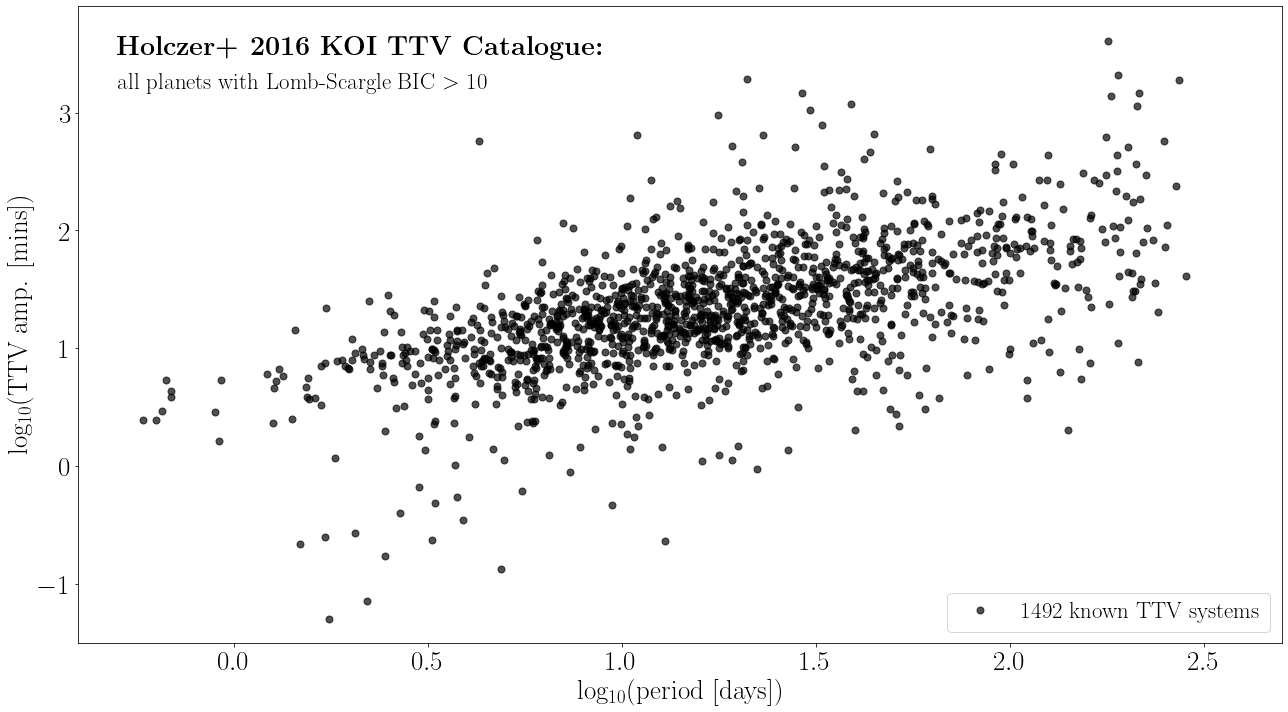

In [33]:
plt.figure(figsize=[18,10])

'''
plt.plot(ttv_multi_planet_periods, ttv_multi_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#80bbff', alpha = .69, zorder=2,
         label = str(len(ttv_multi_planets.T)) + '/' + str(len(ttv_planets)) + ' known multis')

plt.plot(ttv_single_planet_periods, ttv_single_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#700055', alpha = .69, zorder=1,
         label = str(len(ttv_single_planets.T)) + '/' + str(len(ttv_planets)) + r' $\mathbf{not}$ known multis')

'''
plt.plot(ttv_single_planet_periods, ttv_single_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = 'k', alpha = .69, zorder=2,
         label = str(len(ttv_planets)) + ' known TTV systems')

plt.plot(ttv_multi_planet_periods, ttv_multi_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = 'k', alpha = .69, zorder=2)


plt.xlabel(r'log$_\mathrm{10}$(period [days])', fontsize=27)
plt.ylabel(r'log$_\mathrm{10}$(TTV amp. [mins])', fontsize=27)
plt.text(-0.3,3.5,r'\textbf{Holczer+ 2016 KOI TTV Catalogue:}', fontsize=27)
plt.text(-0.3,3.2,'all planets with Lomb-Scargle BIC $>$ 10', fontsize=23)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=23, loc=4)

plt.ylim(-1.5,3.9)
plt.xlim(-.4,2.7)

plt.tight_layout()

plt.savefig('holczer_ttvs_all.pdf')

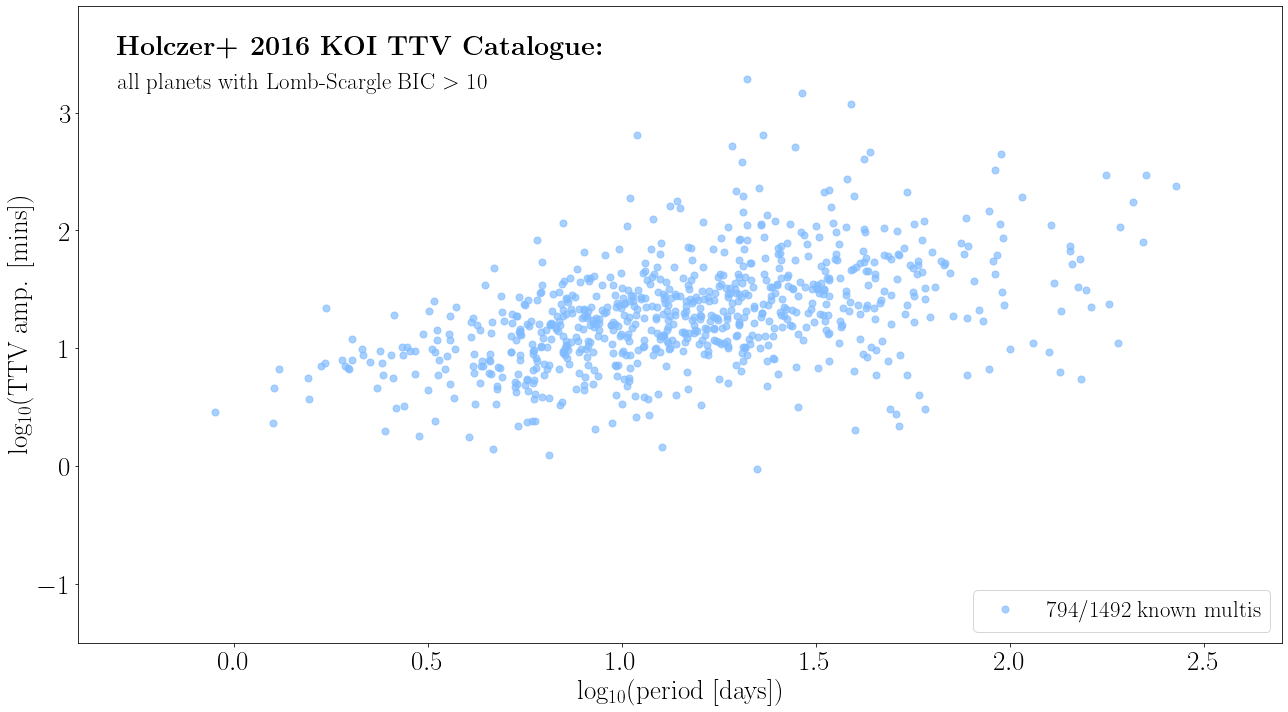

In [34]:
plt.figure(figsize=[18,10])


plt.plot(ttv_multi_planet_periods, ttv_multi_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#80bbff', alpha = .69, zorder=2,
         label = str(len(ttv_multi_planets.T)) + '/' + str(len(ttv_planets)) + ' known multis')
'''
plt.plot(ttv_single_planet_periods, ttv_single_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#700055', alpha = .69, zorder=1,
         label = str(len(ttv_single_planets.T)) + '/' + str(len(ttv_planets)) + r' $\mathbf{not}$ known multis')


plt.plot(np.log10(np.array(ttv_planets).T[0]), np.log10(np.array(ttv_planets).T[1]), 
         marker = 'o', markersize = '7', ls = '', color = 'k', alpha = .69, zorder=2,
         label = str(len(ttv_planets)) + ' known TTV systems')
'''

plt.xlabel(r'log$_\mathrm{10}$(period [days])', fontsize=27)
plt.ylabel(r'log$_\mathrm{10}$(TTV amp. [mins])', fontsize=27)
plt.text(-0.3,3.5,r'\textbf{Holczer+ 2016 KOI TTV Catalogue:}', fontsize=27)
plt.text(-0.3,3.2,'all planets with Lomb-Scargle BIC $>$ 10', fontsize=23)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=23, loc=4)

plt.ylim(-1.5,3.9)
plt.xlim(-.4,2.7)

plt.tight_layout()

plt.savefig('holczer_ttvs_multis.pdf')

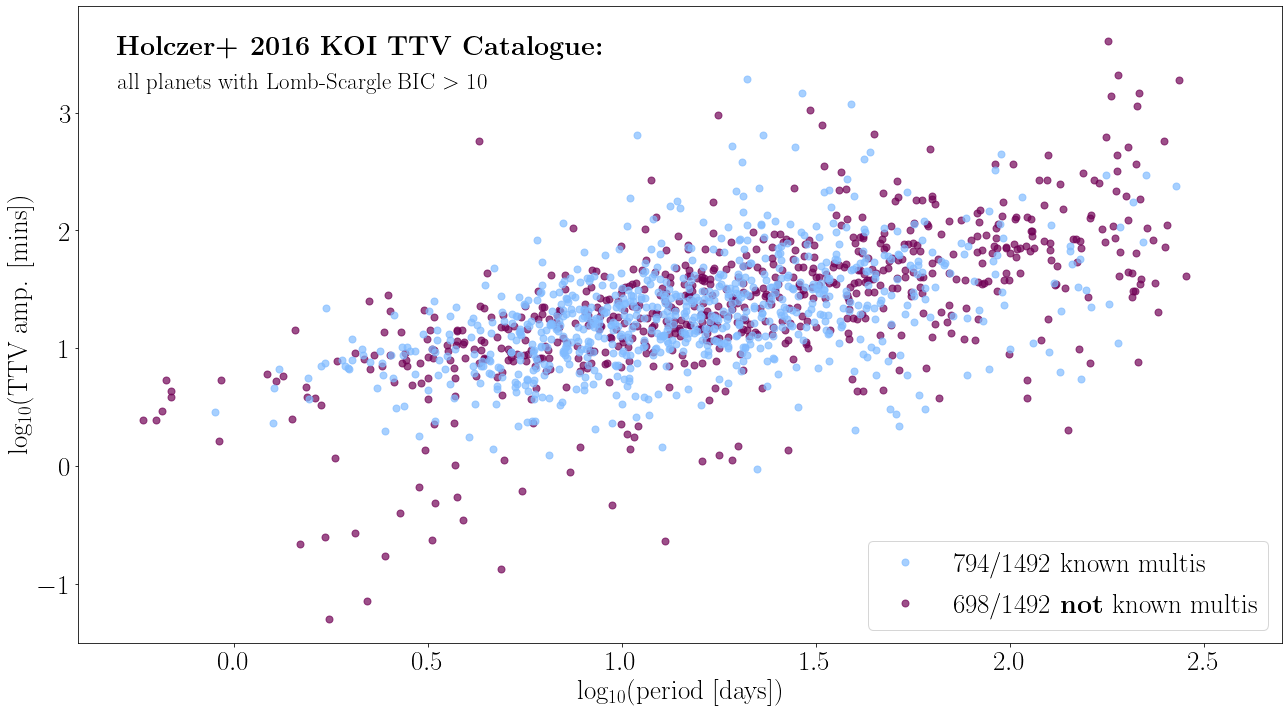

In [35]:

plt.figure(figsize=[18,10])


plt.plot(ttv_multi_planet_periods, ttv_multi_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#80bbff', alpha = .69, zorder=2,
         label = str(len(ttv_multi_planets.T)) + '/' + str(len(ttv_planets)) + ' known multis')

plt.plot(ttv_single_planet_periods, ttv_single_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#700055', alpha = .69, zorder=1,
         label = str(len(ttv_single_planets.T)) + '/' + str(len(ttv_planets)) + r' $\mathbf{not}$ known multis')

'''
plt.plot(np.log10(np.array(ttv_planets).T[0]), np.log10(np.array(ttv_planets).T[1]), 
         marker = 'o', markersize = '7', ls = '', color = 'k', alpha = .69, zorder=2,
         label = str(len(ttv_planets)) + ' known TTV systems')
'''

plt.xlabel(r'log$_\mathrm{10}$(period [days])', fontsize=27)
plt.ylabel(r'log$_\mathrm{10}$(TTV amp. [mins])', fontsize=27)
plt.text(-0.3,3.5,r'\textbf{Holczer+ 2016 KOI TTV Catalogue:}', fontsize=27)
plt.text(-0.3,3.2,'all planets with Lomb-Scargle BIC $>$ 10', fontsize=23)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=27, loc=4)

plt.ylim(-1.5,3.9)
plt.xlim(-.4,2.7)

plt.tight_layout()

plt.savefig('holczer_ttvs_singles_vs_multis.pdf')

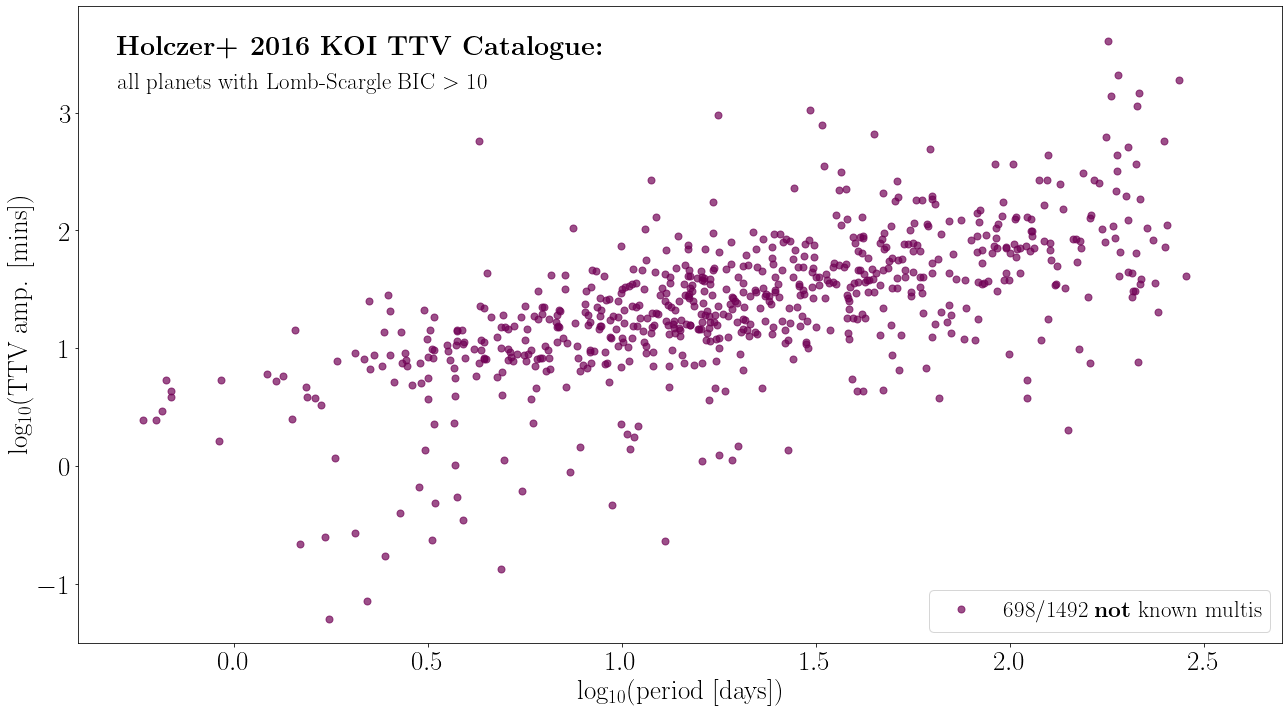

In [36]:
plt.figure(figsize=[18,10])

'''
plt.plot(ttv_multi_planet_periods, ttv_multi_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#80bbff', alpha = .69, zorder=2,
         label = str(len(ttv_multi_planets.T)) + '/' + str(len(ttv_planets)) + ' known multis')
'''

plt.plot(ttv_single_planet_periods, ttv_single_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#700055', alpha = .69, zorder=1,
         label = str(len(ttv_single_planets.T)) + '/' + str(len(ttv_planets)) + r' $\mathbf{not}$ known multis')

'''
plt.plot(np.log10(np.array(ttv_planets).T[0]), np.log10(np.array(ttv_planets).T[1]), 
         marker = 'o', markersize = '7', ls = '', color = 'k', alpha = .69, zorder=2,
         label = str(len(ttv_planets)) + ' known TTV systems')
'''

plt.xlabel(r'log$_\mathrm{10}$(period [days])', fontsize=27)
plt.ylabel(r'log$_\mathrm{10}$(TTV amp. [mins])', fontsize=27)
plt.text(-0.3,3.5,r'\textbf{Holczer+ 2016 KOI TTV Catalogue:}', fontsize=27)
plt.text(-0.3,3.2,'all planets with Lomb-Scargle BIC $>$ 10', fontsize=23)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=23, loc=4)

plt.ylim(-1.5,3.9)
plt.xlim(-.4,2.7)

plt.tight_layout()

plt.savefig('holczer_ttvs_singles.pdf')